In [1]:
import numpy as np 
import skimage.io as io
import keras
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# EDA

In [2]:
datapath = os.getcwd()+'/train'

In [ ]:
os.getcwd()

In [3]:
datalist = os.listdir(datapath)
len(datalist)

25000

In [4]:
datalist[0]

'cat.944.jpg'

In [5]:
#Fetch the paths for images
dogs = glob.glob(datapath+'/*dog*.jpg')
cats = glob.glob(datapath+'/*cat*.jpg')

In [6]:
dogs[0]

'/home/kray/Documents/project/catdog/train/dog.9815.jpg'

In [ ]:
print(len(dogs))
print(len(cats))

In [ ]:
dogs[0]

In [7]:
im = io.imread(dogs[0])
print(type(im),im.shape) 

<class 'numpy.ndarray'> (375, 499, 3)


In [8]:
# check the image dimension
for dog in dogs[:10]:
    print(io.imread(dog).shape)

(375, 499, 3)
(400, 320, 3)
(382, 413, 3)
(299, 288, 3)
(500, 418, 3)
(500, 374, 3)
(416, 500, 3)
(374, 500, 3)
(499, 430, 3)
(400, 369, 3)


In [9]:
im.max()

255

### To Do
1) Find out the max and min for width and height     
2) Show a sample image using io.imshow() or plt.imshow()   
Find more about skimage module io [here](http://scikit-image.org/docs/dev/api/skimage.io.html)     
3) Try cropping sample images and resize, rescale using skimage.transform.rescale and resize    
4) Change some sample images to gray scale and show the result   
#### Discussion
Discuss whether crop, rescale or resizing images are appropriate for your trainig images. What problems might occur for some of your images when you crop, resize, or rescale? (hint: aspect ratio)

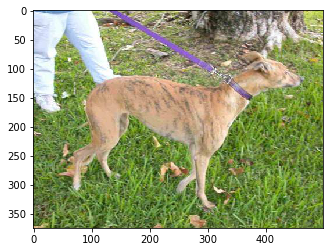

In [10]:
plt.imshow(im)

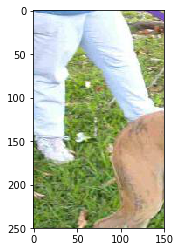

In [11]:
imc = im[:250, :150,:] #cropping array row-> y, column-> x
plt.imshow(imc)

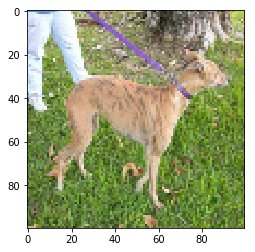

In [12]:
from skimage.transform import resize
imc = resize(im, (100,100,3))
plt.imshow(imc)

### To Do
4) Using your result from 1), pick your best image size (height, width).    
5) Now create a training dataset X and y     
   which are numpy arrays with shapes X.shape = (25000, height, width, 3), y.shape = (25000,)    
   Give label 0 for Dog and 1 for Cat.    

In [13]:
Xdog = np.array([resize(io.imread(dog), (32,32,3)) for dog in dogs])
Xcat = np.array([resize(io.imread(cat), (32,32,3)) for cat in cats])
X = np.concatenate([Xdog, Xcat], axis=0)
y = np.concatenate([np.zeros(len(dogs)), np.ones(len(cats))], axis=0)
# There is a better way to do it in smaller batches in a lazy evaluation when you use a generator.

In [16]:
y.shape

(25000,)

# Preprocessing
Neural net is most comfortable when the image has pixel values normalized.
Also the optimization works best when the images have zero mean.

In [17]:
# Let's have a look what the mean, max and min pixel values for each channel.
for i in range(3):
    print(X[:,:,:,i].max(), X[:,:,:,i].min(), X[:,:,:,i].mean())

1.0 0.0 0.488310076502
1.0 0.0 0.45507727462
1.0 0.0 0.416956270896


Note that the original images pixel values scale from 0 to 255 (check with im.max()), but after skimage.transform.resize, it automatically changed to 0-1 scale (check with imc.max()). This is not true for open cv. So always check your pixel value ranges and rescale it. Now, we are going to make it a zero mean.

In [18]:
means = [X[:,:,:,i].mean() for i in range(3)]
maxs = [X[:,:,:,i].max() for i in range(3)]
mins = [X[:,:,:,i].min() for i in range(3)]
Xn = np.concatenate([np.expand_dims((X[:,:,:,i]-means[i])/(maxs[i]-mins[i]), axis=3) for i in range(3)], axis=3) 

In [22]:
Xn[0,:,:,0].mean()

0.056868668805514722

In [23]:
for i in range(3):
    print(Xn[:,:,:,i].std())    

0.261212055798
0.254647858671
0.257261026162


# Build a model
Now we have data set ready, let's build a convolutional neuralnet model.

In [24]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

In [25]:
Y = to_categorical(y)
Xtr, ytr = shuffle(Xn,Y,random_state=0)

In [26]:
model = Sequential()
model.add(Convolution2D(16,3,3, input_shape=(32,32,3), border_mode="same", activation='relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(2))
model.add(Activation('softmax'))
sgd = SGD(lr=0.01, decay=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['acc']) 

In [ ]:
model.fit(Xtr, ytr, batch_size=32, nb_epoch=15) #Note that nb_epoch has changed to epochs in keras 2.0

Epoch 1/15
 2080/25000 [=>............................] - ETA: 312s - loss: 0.6739 - acc: 0.5870 

### To Do
6) Play with hyper parameters such as filter numbers, nb_epoch, batch_size, learning rate lr, decal and momentum and discuss which hyper parameters had the best effect on the accuracy.    
7) Read the documentation for conv2d and try other options https://keras.io/layers/convolutional/#conv2d    
8) Try Adam optimization. Read https://keras.io/optimizers/ Search web what Adam optimizer does and compare what advantage it has over plain SGD.    
9) Try different activation functions in conv layer(s) or in dense layer(s) https://keras.io/activations/    
10) Add mode conv layers and see if your results increase.    